In [1]:
import numpy as np
from orbitize import results
import orbitize

In [2]:
tau_ref_epoch = 59000
filename="withc_gravity_vandalrv_11eps.hdf5"

In [3]:
res = results.Results()
res.load_results(filename)
chain = res.post
tau_ref_epoch = res.tau_ref_epoch

/home/zieba/anaconda3/lib/python3.7/site-packages/orbitize/basis.py:68: UserWarning: "
                Radial velocity data found in input data, but rv parameters will 
                not be sampled. To sample rv parameters, set 'fit_secondary_mass' 
                to True.
                
  """


In [4]:
print('The used basis for the fit was ', res.fitting_basis)
print('The posteriors are ', res.post)

The used basis for the fit was  Standard
The posteriors are  [[9.93452569e+00 1.05811185e-01 1.55292567e+00 ... 1.20972841e-02
  7.90090312e-03 1.73125284e+00]
 [9.93082532e+00 1.04175110e-01 1.55333264e+00 ... 9.47553513e-03
  8.77912383e-03 1.75089935e+00]
 [9.97358709e+00 1.02529805e-01 1.55306727e+00 ... 8.87198297e-03
  8.51804183e-03 1.76243465e+00]
 ...
 [9.90276917e+00 1.05117350e-01 1.55301562e+00 ... 8.97364885e-03
  8.68058024e-03 1.72961671e+00]
 [9.90545863e+00 1.04898478e-01 1.55306595e+00 ... 8.15016588e-03
  8.52926759e-03 1.73015220e+00]
 [9.92684265e+00 1.00727498e-01 1.55331663e+00 ... 1.22867357e-02
  8.82766347e-03 1.75616114e+00]]


In [5]:
res.labels

['sma1',
 'ecc1',
 'inc1',
 'aop1',
 'pan1',
 'tau1',
 'sma2',
 'ecc2',
 'inc2',
 'aop2',
 'pan2',
 'tau2',
 'plx',
 'mtot']

In [6]:
np.where(np.array(res.labels) == 'ecc1')

(array([1]),)

In [7]:
np.where(np.array(res.labels) == 'ecc2')

(array([7]),)

In [11]:
np.percentile(res.post[:,0], [16, 50, 84]) 

array([9.90358895, 9.93052069, 9.95736491])

In [8]:
np.percentile(res.post[:,1], [16, 50, 84]) 

array([0.10038188, 0.10315261, 0.10605574])

In [12]:
np.percentile(res.post[:,6], [16, 50, 84]) 

array([2.65588214, 2.67653306, 2.7023584 ])

In [13]:
#ecc c
np.percentile(res.post[:,7], [16, 50, 84]) 

array([0.30132462, 0.32052704, 0.33763187])

In [54]:
np.where(np.array(res.labels) == 'mtot')

(array([13]),)

In [58]:
np.percentile(res.post[:,0], [16, 50, 84])

array([9.90358895, 9.93052069, 9.95736491])

In [61]:
np.percentile(res.post[:,-1], [16, 50, 84]) 

array([1.7330874 , 1.75454104, 1.77634839])

In [7]:
sample_number = 10

mjds_requested = np.linspace(58000,59500,1000)

# create a new system class from the results. Set some things as dummy variables = 1
sys = orbitize.system.System(2, res.data, 1, 1, mass_err=1, plx_err=1, fit_secondary_mass=True, tau_ref_epoch=res.tau_ref_epoch)

ra, dec, rv = sys.compute_all_orbits(res.post[4], mjds_requested)


In [22]:
sys.per

AttributeError: 'System' object has no attribute 'per'

<IPython.core.display.Javascript object>


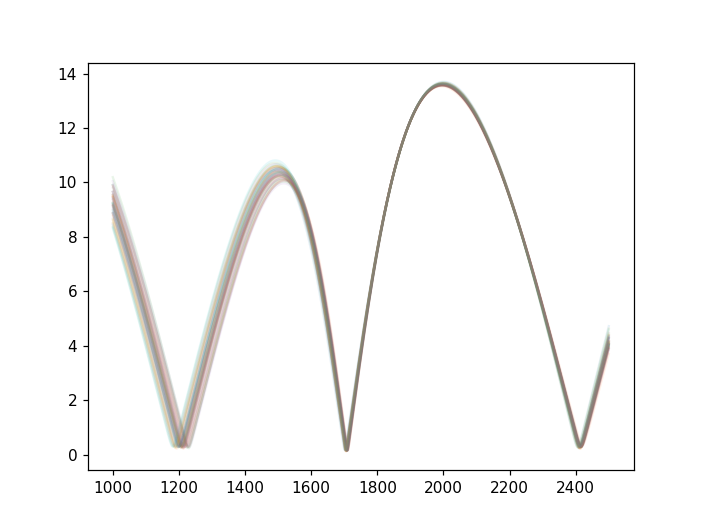

In [8]:
import matplotlib.pyplot as plt
%matplotlib notebook
for i in np.arange(50):
    ra, dec, rv = sys.compute_all_orbits(res.post[i], mjds_requested)
    r = np.sqrt(ra*ra+dec*dec)
#    plt.plot(ra[:,:,0],dec[:,:,0],alpha=0.1)
    plt.plot(mjds_requested-57000,r[:,2,0]/11.,alpha=0.1)

In [9]:
from astropy.time import Time
t = Time(59410, format='mjd')
t.iso

'2021-07-15 00:00:00.000'

In [10]:
t = Time(58210, format='mjd')
t.iso

'2018-04-02 00:00:00.000'

In [11]:
from astropy import constants as c
from astropy import units as u
from kepler3 import *

In [18]:
M = 1.75 * u.Msun
Mc = 8.89 * u.Mjup
ac = 2.68 * u.au
ec = 0.32

rhill(M, Mc, ac)*(1-ec)/19.44*u.pc

<Quantity 0.01098418 AU pc>